# Problem :-
### You are given a dataset that records the house prices of 9,761 houses in King County, Washington, US. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc. You are required to design a model to predict the house price.

### We are trying to build the model which can predict the price of house based on the attributes given. This will help the real estate agents, buyer and seller of the house to know the price of the house of their interest just by giving the attributes. This model will also help user to analyze that which are the attributes or features which are having a significant role in deciding the price of a house. User can vary the attributes and can see how the house price is changing.

In [27]:
# importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression    # for linear regression model
from sklearn.model_selection import cross_val_score  # for cross-validation
from sklearn.tree import DecisionTreeRegressor       # for decision tree regressor problem

In [3]:
# reading the datasets
train_data = pd.read_csv("kc_house_train_data.csv")
test_data = pd.read_csv("kc_house_test_data.csv")

In [101]:
train_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,logged sqft_living,logged price,year of selling,month of selling,age
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,7.580700,13.311329,2014,12,49
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,98053,47.6561,-122.005,4760,101930,8.597851,14.018451,2014,5,13
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,98115,47.6900,-122.292,1330,6000,7.056175,13.056224,2014,5,72
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,98028,47.7558,-122.229,1780,12697,7.265430,12.644328,2014,5,87
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,98074,47.6127,-122.045,1370,10208,7.222566,12.899220,2014,10,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,98144,47.5699,-122.288,1400,1230,7.306531,12.969212,2015,1,1
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,98056,47.5137,-122.167,2520,6023,7.832014,13.322337,2014,10,0
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,98136,47.5537,-122.398,2050,6200,8.163371,13.822983,2015,3,6
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,6.927558,12.904459,2014,6,5


In [58]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'logged sqft_living',
       'logged price', 'year of selling', 'month of selling', 'age'],
      dtype='object')

# Hypothesis :-

### After reading the dataset and understanding all the variables, it seems like the target variable (price) is dependent on (sqft_living, bedrooms, floors, condition, grade, year_renovated). This will be our initial hypothesis.

# Exploratory Data Analysis :-

### After formulating our initial hypothesis, we will do EDA on the dataset to check whether our initial hypothesis is correct or not. For EDA, we will first check the types of variables (numerical or categorical), then we will look if there are missing values present in the training or test dataset. If there are missing values present, we have to impute them. Then, in training dataset, we will analyze the variables by creating graphs and correlation matrix. We will check the dependency of our target variable on all the independent variables. This will give us an idea that the hypothesis we formulated was correct or not.

## => Checking datatypes of variables :-

In [4]:
train_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
test_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## => Checking Null Values :-

In [6]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
test_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## => Creating plots for our hypothesis variables :-

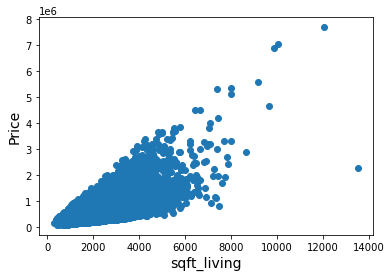

In [9]:
# hypothesis_variables = ['sqft_living', 'bedrooms', 'floors', 'condition', 'grade', 'yr_renovated']
# target_variable = ['price']

plt.scatter(train_data['sqft_living'], train_data['price'])
plt.xlabel('sqft_living', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

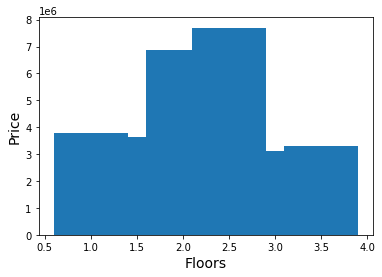

In [59]:
plt.bar(train_data['floors'], train_data['price'])
plt.xlabel('Floors', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

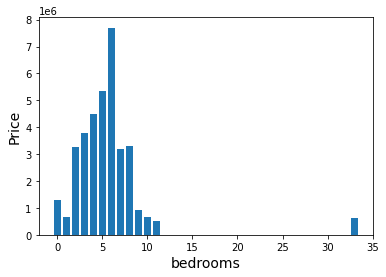

In [60]:
plt.bar(train_data['bedrooms'], train_data['price'])
plt.xlabel('bedrooms', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

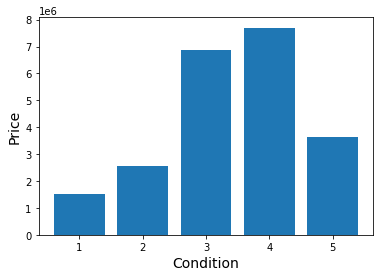

In [61]:
plt.bar(train_data['condition'], train_data['price'])
plt.xlabel('Condition', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

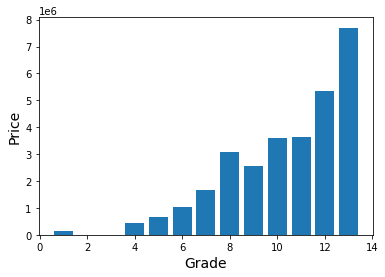

In [62]:
plt.bar(train_data['grade'], train_data['price'])
plt.xlabel('Grade', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

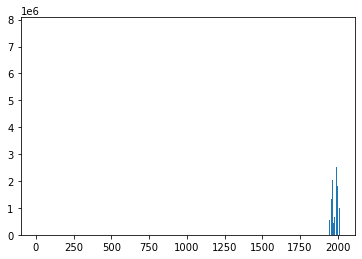

In [14]:
plt.bar(train_data['yr_renovated'], train_data['price'])
plt.xlabel('Year Renovated', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

## => Creating Correlation Matrix :-
### It will give us the better picture to understand how each variable is related to the target variable.

In [15]:
corr_matrix = train_data.corr()
# print(corr_matrix)

corr_matrix.style.background_gradient(cmap='RdYlGn')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


### By observing the plots for variables and correlation matrix, we found that our hypothesis is not correct. From our hypothesis variables, only 'sqft_living' and 'grade' are having significant correlation with the target variable 'price'. Rest other variables are not having significant correlation with the target variable. We will not select these variables for the training of our model as they are not having much significance.
### However, there were few variables which we did not take into consideration while formulating our hypothesis, they found out to be having good correlation with the target variable. Those variables are, 'bathrooms', 'sqft_above', 'sqft_living15' and 'view'. So we also have to consider these variables in the process of training the model.

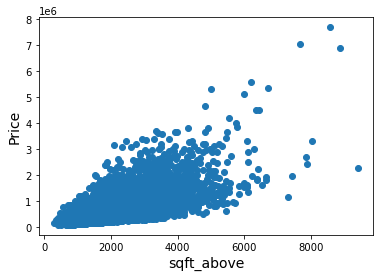

In [16]:
plt.scatter(train_data[ 'sqft_above'], train_data['price'])
plt.xlabel( 'sqft_above', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

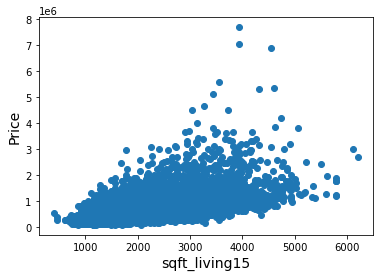

In [17]:
plt.scatter(train_data['sqft_living15'], train_data['price'])
plt.xlabel('sqft_living15', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

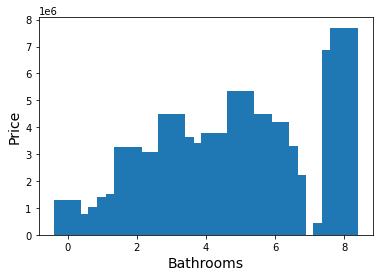

In [63]:
plt.bar(train_data['bathrooms'], train_data['price'])
plt.xlabel('Bathrooms', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

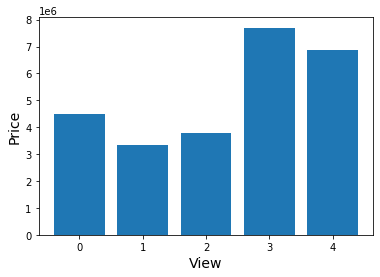

In [64]:
plt.bar(train_data['view'], train_data['price'])
plt.xlabel('View', fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

# Model Fitting :-

### By doing EDA on our dataset, we got to know that which variables are having significant correlation with our target variable. Therefore, we will select some set of predictors to train different linear regression models on our training dataset. We will evaluate the performance of the model by its R square value and RMSE value.

### 1. Based on correlation of variables with target variable, we will be taking variables having high correlation with the target variable. In correlation matrix we found that 'sqft_living', 'grade', 'bathrooms' and 'view' are having significant correlation with 'price'. Also 'sqft_living', 'sqft_above', 'sqft_living15' are correlated with each other, therefore, we are taking only 'sqft_living' which has highest correlation with the 'price'.

In [5]:
x_train = train_data[['sqft_living', 'grade', 'bathrooms', 'view']]
y_train = train_data["price"]

model1 = LinearRegression()
score1 = cross_val_score(model1, x_train, y_train, cv=10, scoring='r2')
score2 = cross_val_score(model1, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('The rmse value is',np.abs(score2.mean()))
print('The r square value is',score1.mean())


The rmse value is 247115.69283924796
The r square value is 0.5685659633983481


### 2. To improve the accuracy of previous model, we will add more variables to train the model which we find significant. We are adding 'bedrooms' and 'waterfront'.

In [6]:
x_train = train_data[['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'view', 'waterfront']]
y_train = train_data["price"]

model2 = LinearRegression()
score1 = cross_val_score(model2, x_train, y_train, cv=10, scoring='r2')
score2 = cross_val_score(model2, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('The rmse value is',np.abs(score2.mean()))
print('The r square value is',score1.mean())


The rmse value is 241094.1350049655
The r square value is 0.5882855681292949


### 3. For further improvement in performance of our model, we are adding few more variables to see if they can improve the performance of the previous model. We thought that location of the house and in which year it is built can help us to predict the price of house more accurately, so we are adding 'lat', and 'yr_built' in our model to see if the performance is increasing.

In [9]:
x_train = train_data[['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built']]
y_train = train_data["price"]

model3 = LinearRegression()
score1 = cross_val_score(model3, x_train, y_train, cv=10, scoring='r2')
score2 = cross_val_score(model3, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('The rmse value is',np.abs(score2.mean()))
print('The r square value is',score1.mean())



The rmse value is 211254.4212362954
The r square value is 0.6846460109606534


### => We further tried to add the variables, but they are not showing any significant improvement in the performance of our model and increasing its complexity, so we are not considering them. Therefore, the model 3 is giving us the best performance.

# FEATURE ENGINEERING


### Feature engineering is done to extract and organize the important features from the dataset which can help us to fit a machine learning model with good performance.

### 1. LOG TRANSFORMATION

### Some variables which are having skewed distribution. After analyzing there range which is greater than zero, we decided to do the log transformation of that variable so that the distribution becomes normal and it also does the scaling of that variable in logarithm scale. We are doing log transformation of variables 'price' and 'sqft_living'.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

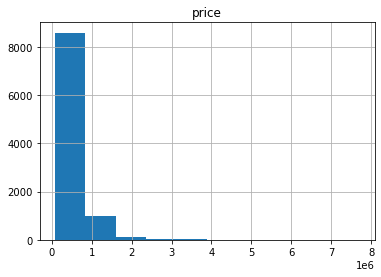

In [11]:
train_data.hist(column='price')

In [12]:
train_data['logged price']=np.log(train_data.price)
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged sqft_living,logged price
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,7.580700,13.311329
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,8.597851,14.018451
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,300,1942,0,98115,47.6900,-122.292,1330,6000,7.056175,13.056224
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,0,1927,0,98028,47.7558,-122.229,1780,12697,7.265430,12.644328
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,0,1977,0,98074,47.6127,-122.045,1370,10208,7.222566,12.899220


array([[<AxesSubplot:title={'center':'logged price'}>]], dtype=object)

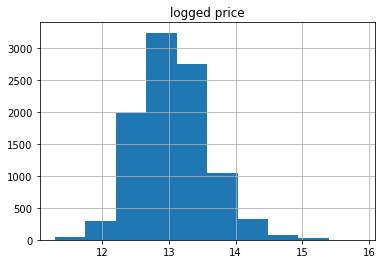

In [13]:
train_data.hist(column='logged price')

### FEATURE SQFT_LIVING BEFORE LOG TRANSFORMATION

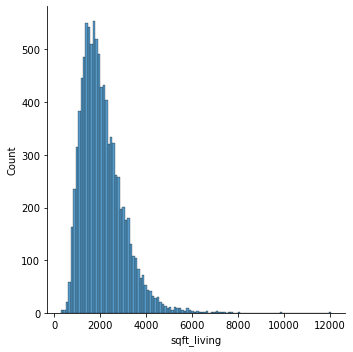

In [14]:
sns.displot(train_data['sqft_living'])

In [10]:
train_data['logged sqft_living']=np.log(train_data.sqft_living)
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged sqft_living
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7.580700
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,8.597851
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,7.056175
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,7.265430
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,7.222566


### FEATURE SQFT_LIVING AFTER LOG TRANSFORMATION

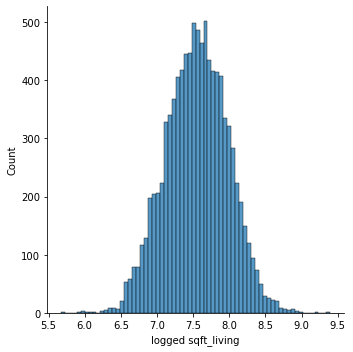

In [15]:
sns.displot(train_data['logged sqft_living'])

### If we graph a distribution plot of living area sqft, we get a highly skewed representation of the data, as shown in the first plot above. While looking at our example, taking the log of price and sqft of living would rescale the coefficients into a normal distribution curve. This effectively changes the range of the data into a natural logarithm.

In [97]:
x_train = train_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built']]
y_train = train_data["logged price"]

model4 = LinearRegression()
score1 = cross_val_score(model4, x_train, y_train, cv=10, scoring='r2')
score2 = cross_val_score(model4, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('The rmse value is',np.abs(score2.mean()))
print('The R square value is',score1.mean())


The rmse value is 0.2601455649234396
The R square value is 0.7581453825363675


### We have fitted the best performing model (Model 3) with the new variables i.e. log transformed variables ('price' and 'sqft_living'. We can see that the performance of the model is improved significantly. Therefore, we conclude that the log transformation of variables has improved the performance of our model.

### 2. CREATING A NEW VARIABLE

#### => CREATING TWO NEW VARIABLES FROM DATE :- YEAR OF SELLING AND MONTH OF SELLING

In [96]:
train_data['year of selling'] = pd.DatetimeIndex(train_data['date']).year
train_data[['year of selling']]

,year of selling
0,2014
1,2014
2,2014
3,2014
4,2014
...,...
9756,2015
9757,2014
9758,2015
9759,2014


### Training the model by adding the year of selling feature

In [54]:
x_train = train_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built','year of selling']]
y_train = train_data["logged price"]

model5 = LinearRegression()
score1 = cross_val_score(model5, x_train, y_train, cv=10, scoring='r2')
score2 = cross_val_score(model5, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('The rmse value is',np.abs(score2.mean()))
print('The R square value is',score1.mean())

The rmse value is 0.25932052428757724
The R square value is 0.7596889239095763


### The r square value doesnt seem much increasing compared to model 4

### => Creating a new variable age of the house

In [19]:
train_data['age']=train_data['year of selling'] - train_data.yr_built
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,logged sqft_living,logged price,year of selling,month of selling,age
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,7.580700,13.311329,2014,12,49
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,98053,47.6561,-122.005,4760,101930,8.597851,14.018451,2014,5,13
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,98115,47.6900,-122.292,1330,6000,7.056175,13.056224,2014,5,72
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,98028,47.7558,-122.229,1780,12697,7.265430,12.644328,2014,5,87
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,98074,47.6127,-122.045,1370,10208,7.222566,12.899220,2014,10,37


### Adding feature age to the above model

In [55]:
x_train = train_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built', 'age']]
y_train = train_data["logged price"]

model6 = LinearRegression()
score1 = cross_val_score(model6, x_train, y_train, cv=10, scoring='r2')
score2 = cross_val_score(model6, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('The rmse value is',np.abs(score2.mean()))
print('The R square value is',score1.mean())


The rmse value is 0.25932052428757524
The R square value is 0.7596889239095805


### The r square value doesnt seem much increasing compared to model 4 and 5

### FORWARD SELECTION

### n feature is set as 11 ,since after that feature addition there is no much increase in the r square value


### The True value specifies that those predictors are selected in the forward selection process

In [ ]:
X_train=train_data.drop(['id','date','price','logged price'],axis='columns')
y_train=train_data['logged price']
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(model5, n_features_to_select=11)
sfs.fit(X_train, y_train)

In [46]:
sfs.get_support()

array([False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True, False])

### Reading the data and assigning those selected predictors and target feature


### Calculating the R sqaure value using cross validation for those selected predictors

In [31]:
x=train_data[['bathrooms','sqft_living','view','condition','grade','yr_built','lat','sqft_living15','floors','waterfront','year of selling']]
y=train_data['logged price']
model7=LinearRegression()
score1 = cross_val_score(model7, x, y, cv=10, scoring='r2')
score2 = cross_val_score(model7, x, y, cv=10, scoring='neg_root_mean_squared_error')
print('The rmse value is',np.abs(score2.mean()))
print('The R square value is',score1.mean())

The rmse value is 0.2542587928165093
The R square value is 0.7688448933596546


### Calculating the RMSE for those predictors

In [32]:
scores = cross_val_score(model5, x, y, cv=10, scoring='neg_root_mean_squared_error')
a=np.abs(scores.mean())
a

0.2542587928165093

### DECISION TREE
### For all the previous models which we did using linear regression , we are just try decision tree model for those set of predictors in each respective model

### DECISION TREE FOR MODEL 1

In [65]:
X_train = train_data[['sqft_living', 'grade', 'bathrooms', 'view']]
y_train = train_data["price"]
rmsescore=[]
r2score=[]
index=[]
for i in range(1,7):             # taking range between 1 to 7 for min_samples leaf        
    for j in range(1,7):         # taking range between 1 to 7 for max depth
        model1=DecisionTreeRegressor(min_samples_leaf=i,max_depth=j)
        score1=cross_val_score(model1,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
        score2=cross_val_score(model1,X_train,y_train,cv=10,scoring='r2')
        index.append([i,j])           # appending the pair values of min samplesleaf and max depth
        rmsescore.append((np.abs(score1)).mean())
        r2score.append(score2.mean())
rmsevalue=rmsescore.index(min(rmsescore))
r2value=max(r2score)
index=index[rmsevalue]                  # indexing the pair which produced the minimum error
        
print("The rmse score is",min(rmsescore))
print('The R square value is',r2value)
print("The perfect min_samples leaf value is",index[0])
print("The perfect max_depth value is",index[1])
        

The rmse score is 240334.08486673803
The R square value is 0.5894807726526724
The perfect min_samples leaf value is 3
The perfect max_depth value is 6


### DECISION TREE FOR MODEL 2

In [66]:
X_train = train_data[['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'view', 'waterfront']]
y_train = train_data["price"]

rmsescore=[]
r2score=[]
index=[]
for i in range(1,7):             # taking range between 1 to 7 for min_samples leaf        
    for j in range(1,7):         # taking range between 1 to 7 for max depth
        model2=DecisionTreeRegressor(min_samples_leaf=i,max_depth=j)
        score1=cross_val_score(model2,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
        score2=cross_val_score(model2,X_train,y_train,cv=10,scoring='r2')
        index.append([i,j])           # appending the pair values of min samplesleaf and max depth
        rmsescore.append((np.abs(score1)).mean())
        r2score.append(score2.mean())
rmsevalue=rmsescore.index(min(rmsescore))
r2value=max(r2score)
index=index[rmsevalue]                  # indexing the pair which produced the minimum error
        
print("The rmse score is",min(rmsescore))
print('The R square value is',r2value)
print("The perfect min_samples leaf value is",index[0])
print("The perfect max_depth value is",index[1])

The rmse score is 234579.78687368444
The R square value is 0.6084880840310758
The perfect min_samples leaf value is 2
The perfect max_depth value is 6


### DECISION TREE FOR MODEL 3

In [67]:
X_train = train_data[['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built']]
y_train = train_data["price"]


rmsescore=[]
r2score=[]
index=[]
for i in range(1,7):             # taking range between 1 to 7 for min_samples leaf        
    for j in range(1,7):         # taking range between 1 to 7 for max depth
        model3=DecisionTreeRegressor(min_samples_leaf=i,max_depth=j)
        score1=cross_val_score(model3,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
        score2=cross_val_score(model3,X_train,y_train,cv=10,scoring='r2')
        index.append([i,j])           # appending the pair values of min samplesleaf and max depth
        rmsescore.append((np.abs(score1)).mean())
        r2score.append(score2.mean())
rmsevalue=rmsescore.index(min(rmsescore))
r2value=max(r2score)
index=index[rmsevalue]                  # indexing the pair which produced the minimum error
        
print("The rmse score is",min(rmsescore))
print('The R square value is',r2value)
print("The perfect min_samples leaf value is",index[0])
print("The perfect max_depth value is",index[1])


The rmse score is 207481.6123307354
The R square value is 0.693874597169353
The perfect min_samples leaf value is 6
The perfect max_depth value is 6


### DECISION TREE FOR MODEL 4

In [72]:
X_train = train_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built']]
y_train = train_data["logged price"]

rmsescore=[]
r2score=[]
index=[]
for i in range(1,7):             # taking range between 1 to 7 for min_samples leaf        
    for j in range(1,7):         # taking range between 1 to 7 for max depth
        model4=DecisionTreeRegressor(min_samples_leaf=i,max_depth=j)
        score1=cross_val_score(model4,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
        score2=cross_val_score(model4,X_train,y_train,cv=10,scoring='r2')
        index.append([i,j])           # appending the pair values of min samplesleaf and max depth
        rmsescore.append((np.abs(score1)).mean())
        r2score.append(score2.mean())
rmsevalue=rmsescore.index(min(rmsescore))
r2value=max(r2score)
index=index[rmsevalue]                  # indexing the pair which produced the minimum error
        
print("The rmse score is",min(rmsescore))
print('The R square value is',r2value)
print("The perfect min_samples leaf value is",index[0])
print("The perfect max_depth value is",index[1])


The rmse score is 0.2527591937151554
The R square value is 0.7717663313117401
The perfect min_samples leaf value is 4
The perfect max_depth value is 6


### DECISION TREE FOR MODEL 5

In [73]:
X_train = train_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built','year of selling']]
y_train = train_data["logged price"]
rmsescore=[]
r2score=[]
index=[]
for i in range(1,7):             # taking range between 1 to 7 for min_samples leaf        
    for j in range(1,7):         # taking range between 1 to 7 for max depth
        model5=DecisionTreeRegressor(min_samples_leaf=i,max_depth=j)
        score1=cross_val_score(model5,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
        score2=cross_val_score(model5,X_train,y_train,cv=10,scoring='r2')
        index.append([i,j])           # appending the pair values of min samplesleaf and max depth
        rmsescore.append((np.abs(score1)).mean())
        r2score.append(score2.mean())
rmsevalue=rmsescore.index(min(rmsescore))
r2value=max(r2score)
index=index[rmsevalue]                  # indexing the pair which produced the minimum error
        
print("The rmse score is",min(rmsescore))
print('The R square value is',r2value)
print("The perfect min_samples leaf value is",index[0])
print("The perfect max_depth value is",index[1])




The rmse score is 0.2528071922482996
The R square value is 0.7716821156899105
The perfect min_samples leaf value is 4
The perfect max_depth value is 6


### DECISION TREE FOR MODEL 6

In [70]:
X_train = train_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built','age']]
y_train = train_data["logged price"]

rmsescore=[]
r2score=[]
index=[]
for i in range(1,7):             # taking range between 1 to 7 for min_samples leaf        
    for j in range(1,7):         # taking range between 1 to 7 for max depth
        model6=DecisionTreeRegressor(min_samples_leaf=i,max_depth=j)
        score1=cross_val_score(model6,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
        score2=cross_val_score(model6,X_train,y_train,cv=10,scoring='r2')
        index.append([i,j])           # appending the pair values of min samplesleaf and max depth
        rmsescore.append((np.abs(score1)).mean())
        r2score.append(score2.mean())
rmsevalue=rmsescore.index(min(rmsescore))
r2value=max(r2score)
index=index[rmsevalue]                  # indexing the pair which produced the minimum error
        
print("The rmse score is",min(rmsescore))
print('The R square value is',r2value)
print("The perfect min_samples leaf value is",index[0])
print("The perfect max_depth value is",index[1])


The rmse score is 0.25300707217256246
The R square value is 0.7713323606889653
The perfect min_samples leaf value is 4
The perfect max_depth value is 6


### DECISION TREE FOR MODEL 7

In [92]:
X_train=train_data[['bathrooms','sqft_living','view','condition','grade','yr_built','lat','sqft_living15','floors','waterfront','year of selling']]
y_train=train_data['logged price']

rmsescore=[]
r2score=[]
index=[]
for i in range(1,7):             # taking range between 1 to 7 for min_samples leaf        
    for j in range(1,7):         # taking range between 1 to 7 for max depth
        model7=DecisionTreeRegressor(min_samples_leaf=i,max_depth=j)
        score1=cross_val_score(model7,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
        score2=cross_val_score(model7,X_train,y_train,cv=10,scoring='r2')
        index.append([i,j])           # appending the pair values of min samplesleaf and max depth
        rmsescore.append((np.abs(score1)).mean())
        r2score.append(score2.mean())
rmsevalue=rmsescore.index(min(rmsescore))
r2value=max(r2score)
index=index[rmsevalue]                  # indexing the pair which produced the minimum error
        
print("The rmse score is",min(rmsescore))
print('The R square value is',r2value)
print("The perfect min_samples leaf value is",index[0])
print("The perfect max_depth value is",index[1])


The rmse score is 0.25293687360458006
The R square value is 0.7714051020347125
The perfect min_samples leaf value is 4
The perfect max_depth value is 6


# Testing :-

In [74]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


### FEATURE ENGINEERING ON TEST DATA

In [75]:
test_data['logged sqft_living']=np.log(test_data.sqft_living)
test_data['logged price']=np.log(test_data.price)
test_data['year of selling'] = pd.DatetimeIndex(test_data['date']).year
test_data['month of selling']=pd.DatetimeIndex(test_data['date']).month
test_data['age']=test_data['year of selling'] - test_data.yr_built

In [76]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,logged sqft_living,logged price,year of selling,month of selling,age
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,98038,47.3684,-122.031,2390,7570,7.544332,12.685408,2015,3,12
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,98107,47.6700,-122.394,1360,4850,7.501082,13.180632,2015,3,115
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,98002,47.3089,-122.210,1060,5095,7.090077,12.149502,2014,12,93
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,98117,47.6823,-122.368,1460,5000,7.753624,13.440817,2014,6,85
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,98001,47.3341,-122.282,1290,7800,7.106606,12.388394,2015,2,46


### 1. Testing with Decision tree model-7 :-

In [93]:
X_train=train_data[['bathrooms','sqft_living','view','condition','grade','yr_built','lat','sqft_living15','floors','waterfront','year of selling']]
y_train=train_data['logged price']
X_test=test_data[['bathrooms','sqft_living','view','condition','grade','yr_built','lat','sqft_living15','floors','waterfront','year of selling']]
y_test=test_data['price']
model7.fit(X_train,y_train)
pre=model7.predict(X_test)
pre

array([12.60882506, 13.17693607, 12.30613599, ..., 13.04745807,
       12.82600335, 13.14513843])

In [94]:
pre=(np.exp(pre))  # back transformation of logged data
pre

array([299187.29465944, 528044.62436628, 221048.18598622, ...,
       463915.66911032, 371759.84790501, 511518.19090143])

In [95]:
error=y_test-pre
mae=np.sum(np.abs(error))
mae=mae/len(y_test)
mae

112389.78496158193

### Testing with Decision tree model-6 :-

In [84]:
X_train=train_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built','age']]
y_train=train_data['logged price']
X_test=test_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built','age']]
y_test=test_data['price']
model6.fit(X_train,y_train)
pre=model6.predict(X_test)
pre

array([12.54132777, 13.17693607, 12.30613599, ..., 13.04745807,
       12.82600335, 13.14513843])

In [85]:
pre=(np.exp(pre))  # back transformation of logged data
pre

array([279659.41488963, 528044.62436629, 221048.18598622, ...,
       463915.66911033, 371759.84790501, 511518.19090143])

In [86]:
error=y_test-pre
mae=np.sum(np.abs(error))
mae=mae/len(y_test)
mae

112450.30974015199

### 3. Testing with Decision tree model-5 :-

In [87]:
X_train=train_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built','year of selling']]
y_train=train_data['logged price']
X_test=test_data[['logged sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'waterfront', 'lat', 'yr_built','year of selling']]
y_test=test_data['price']
model5.fit(X_train,y_train)
pre=model5.predict(X_test)
pre

array([12.54132777, 13.17693607, 12.30613599, ..., 13.04745807,
       12.82600335, 13.14513843])

In [88]:
pre=(np.exp(pre))  # back transformation of logged data
pre

array([279659.41488963, 528044.62436629, 221048.18598622, ...,
       463915.66911033, 371759.84790501, 511518.19090143])

In [89]:
error=y_test-pre
mae=np.sum(np.abs(error))
mae=mae/len(y_test)
mae

112510.66147499769

### After evaluating the models on the basis of mean absolute error. We found out the best performing model is the Decision Tree Model-7.